In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#loading the data from the csv file into a pandas dataframe
df = pd.read_csv("chardata.csv")
df.shape

(372450, 785)

In [3]:
df.rename(columns={'0':'label'}, inplace= True)

In [4]:
#Splitting the dataset into target vector and label array
X = df.drop("label", axis= 1).values
y = df["label"].values

print(f"Shape of X and y: {X.shape, y.shape}")

Shape of X and y: ((372450, 784), (372450,))


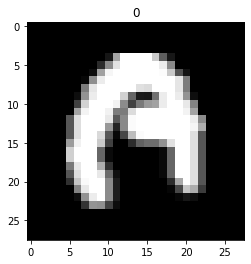

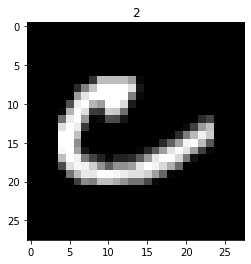

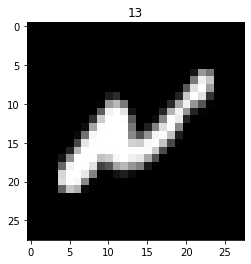

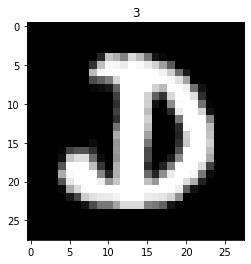

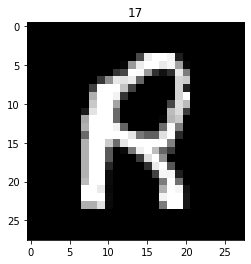

In [5]:
#printing 5 random images to gain info about the dataset
for i in range(5):
    k = np.random.randint(low= 0,high= 372450)
    plt.imshow(X[k,:].reshape(28,28), cmap="gray")
    plt.title(y[k])
    plt.show()

In [6]:
#creating the NN model
model = Sequential(
    [
        tf.keras.Input(shape=(784,),),
        Dense(200, activation= "relu"),
        Dense(150, activation= "relu"),
        Dense(100, activation= "relu"),
        Dense(50, activation= "relu"),
        Dense(26, activation= "linear")
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               157000    
                                                                 
 dense_1 (Dense)             (None, 150)               30150     
                                                                 
 dense_2 (Dense)             (None, 100)               15100     
                                                                 
 dense_3 (Dense)             (None, 50)                5050      
                                                                 
 dense_4 (Dense)             (None, 26)                1326      
                                                                 
Total params: 208,626
Trainable params: 208,626
Non-trainable params: 0
_________________________________________________________________


In [7]:
#splitting the dataset into training set and test set 

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.95)

print(f"Shape of X_test and X_train: {X_test.shape, X_train.shape}")

Shape of X_test and X_train: ((18623, 784), (353827, 784))


In [8]:
#splitting the test set into test set and cross validation set

X_test, X_cv, y_test, y_cv = train_test_split(X_test, y_test, train_size= 0.4)

print(f"Shape of X_test and X_cv: {X_test.shape, X_cv.shape}")

Shape of X_test and X_cv: ((7449, 784), (11174, 784))


In [ ]:
#compiling the model and fitting it to the training set

model.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
    optimizer= tf.keras.optimizers.Adam(0.001)
)

model.fit(X_train, y_train)